# FINAL PROJECT - Data Analysis
---

**<font size="5">Members and contribution</font>**

|ID's Student|Fullname|Contribute rate (%)|
|---------------|---------|---------------------|
|20127028|Võ Văn Hoàng        |100%|
|20127054|Ngô Văn Trung Nguyên|100%|


***The dataset was downloaded by us on the website of Kaggle which is an open source and free for everyone to access and download:***
***https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries/discussion?select=Levels_Fyi_Salary_Data.csv***

---

**<font size="5">Collect Data</font>**

- This dataset contains useful information such as education level, compensation (base salary, bonus, stock grants), race, and more.
- It consists of 62,000 salary records from top companies. 
- This data was scraped off levels.fyi and then the author cleaned it up a tad.
- It is Public Domain which is in the state of belonging or being available to the public as a whole, and therefore not subject to copyright.

---

**<font size="5">Explore Data</font>**

### Environment

In [1]:
import sys
sys.executable

'c:\\Users\\42nvt\\miniconda3\\envs\\min_ds-env\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime
import statistics
import seaborn as sns
from matplotlib import cycler

### Data Analysis Checklist:
- Check the data type whether it is matched with each attribute or not.
- Check the null values and the duplicate values.
- Check the outlier values.
- Check univariate and multivariate correlations.

### Questions about data set:
- Did you clearly understand the attributes in your data sets?
- Have you considered whether the question can be answered with the available data?

### Data preprocessing:
#### Read data from file:

In [3]:
salary_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
rows, cols = salary_df.shape
print('Number of Rows: ', rows)
print('Number of Columns: ', cols)
salary_df.head()

Number of Rows:  62642
Number of Columns:  29


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


# Content of each column

In [4]:
salary_df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

# Definition of each column:

|Order|Name of column|Meaning|
|-----|--------------|-------|
|1|timestamp|Date and time that information was recorded|
|2|company|Name of woring company|
|3|level|Level in working job|
|4|title|Job position|
|5|totalyearlycompensation|The final salary received each year($)|
|6|location|Working place|
|7|yearsofexperience|Number of experience years|
|8|yearsatcompany|Number of years working for that company|
|9|tag|Type of work|
|10|basesalary|The raw salary|
|11|stockgrantvalue|Rewarded value by stock|
|12|bonus|Rewarded money|
|13|gender|Male or female|
|14|otherdetails|More description about the job|
|15|cityid|ID of the city|
|16|dmaid|Designated Market Area ID|
|17|rowNumber|Number of rows|
|18|Masters_Degree|Have Master Degree or not|
|19|Bachelors_Degree|Have Bachelors Degree or not|
|20|Doctorate_Degree|Have Doctorate Degree or not|
|21|Highschool|Graduated High School or not|
|22|Some_College|Studied in any college or not|
|23|Race_Asian|Asian|
|24|Race_White|Citizens who have white race|
|25|Race_Two_Or_More|Have 2 or more races|
|26|Race_Black|Citizens who have black race|
|27|Race_Hispanic|American with the root of Latinos or Spanish|
|28|Race|Nation ethnic|
|29|Education|Level of education|




# Does the data have duplicated rows?

In [5]:
salary_dup = salary_df.duplicated().sum()
print('Number of Duplicated rows: ', salary_dup)

Number of Duplicated rows:  0


As we can see that no row is duplicated, let's find our another things

# Is there any redundant or unnecessary column data?


As we can see, 'level', 'cityid', 'dmaid', 'rowNumber', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic' are redudant through our analyse, because:
- **'level'** has various different value because each company has their own definition of **'level'**, so that we only need to keep the **'title'** column and delete the **'level'** column. 
- **'cityid', 'dmaid'** is only location code, we do not need them, we can use **'loction'**.
- **'rowNumber'** column just tells us the order of each row, it is not neccessary for us.
- **'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'** is general included in **'Race'** column, so it is quite redundant.

## Therefore, we are going to delete those redundant and unnecessary columns:

In [6]:
drop_cols = ["level", "cityid", "dmaid", 'rowNumber', "Race_Asian", "Race_White", "Race_Two_Or_More", "Race_Black", "Race_Hispanic" ]
salary_df.drop(drop_cols, axis=1, inplace=True)
salary_df.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


**Let's check again the data:**

In [7]:
rows, cols = salary_df.shape
print('Number of Rows: ', rows)
print('Number of Columns: ', cols)
salary_df.head()

Number of Rows:  62642
Number of Columns:  20


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


Ok, it is better than before, let's explore more!!!

---

# Initial Datatypes of Salary DataFrames

In [8]:
salary_df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race                        object
Education                   object
dtype: object

- *timestamp changes from object to datetime*
- *All the object type change to string*

---

# Preprocessing

**1. timestamp changes from object to datetime**

In [9]:
# date changes from object to datetime
salary_df['timestamp'] = pd.to_datetime(salary_df['timestamp'], infer_datetime_format = True)

**2. company, title, location, tag, gender, otherdetails, Race, Education change from object to string**

In [10]:
# company, title, location, tag, gender, otherdetails, Race, Education change from object to string
salary_df['company'] = salary_df['company'].astype('string')
salary_df['title'] = salary_df['title'].astype('string')
salary_df['location'] = salary_df['location'].astype('string')
salary_df['tag'] = salary_df['tag'].astype('string')
salary_df['gender'] = salary_df['gender'].astype('string')
salary_df['otherdetails'] = salary_df['otherdetails'].astype('string')
salary_df['Race'] = salary_df['Race'].astype('string')
salary_df['Education'] = salary_df['Education'].astype('string')


In [11]:
salary_df.dtypes

timestamp                  datetime64[ns]
company                            string
title                              string
totalyearlycompensation             int64
location                           string
yearsofexperience                 float64
yearsatcompany                    float64
tag                                string
basesalary                        float64
stockgrantvalue                   float64
bonus                             float64
gender                             string
otherdetails                       string
Masters_Degree                      int64
Bachelors_Degree                    int64
Doctorate_Degree                    int64
Highschool                          int64
Some_College                        int64
Race                               string
Education                          string
dtype: object

Before finding out something new, we should seperate the column in 2 types: numerical and categorical

**Numerical column:**
- timestamp
- totalyearlycompensation
- yearsofexperience
- yearsatcompany
- basesalary
- stockgrantvalue
- bonus

**Categorical column:**
- company
- title
- location
- tag 
- gender
- otherdetails
- Masters_Degree
- Bachelors_Degree
- Doctorate_Degree
- Highschool
- Some_College
- Race
- Education

Now we already preprocessed Data

---

# Missing Data Percentage

In [12]:
missing_percentage = salary_df.isnull().sum() * 100 / len(salary_df)
missing_percentage

timestamp                   0.000000
company                     0.007982
title                       0.000000
totalyearlycompensation     0.000000
location                    0.000000
yearsofexperience           0.000000
yearsatcompany              0.000000
tag                         1.363303
basesalary                  0.000000
stockgrantvalue             0.000000
bonus                       0.000000
gender                     31.193129
otherdetails               35.926375
Masters_Degree              0.000000
Bachelors_Degree            0.000000
Doctorate_Degree            0.000000
Highschool                  0.000000
Some_College                0.000000
Race                       64.198142
Education                  51.518151
dtype: float64

Some columns have large missing data percentage. Our team will decide to fill or drop these missing values when we do analysis on these columns later on

---

# With each numerical column, how are values distributed?

In [13]:
# totalyearlycompensation check
nume_df = salary_df.select_dtypes(include=['int64', 'float64'])
nume_df.describe(include='all')

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,0.245698,0.201223,0.028783,0.005108,0.005667
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,0.430504,0.400917,0.167196,0.071291,0.075067
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Notice that yearsofexperience and yearsatcompany have max valaue is 69, very abnormal. Let's see the rows contain them.

In [14]:
salary_df[(salary_df['yearsofexperience'] == 69) | (salary_df['yearsatcompany'] == 69)]

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
46988,2021-04-03 11:04:46,Disney,Product Designer,102000,"Crapo, MD",69.0,69.0,Interaction Design,100000.0,2000.0,0.0,<NA>,Title: Joiooooo,0,0,0,0,0,<NA>,<NA>


There is only 1 row. This person has been working for 1 company for 69 years. Seems abnormal, let's drop this column

In [15]:
salary_df.drop(index=46988, inplace=True)

In [16]:
salary_df[['yearsofexperience', 'yearsatcompany']].describe()

,yearsofexperience,yearsatcompany
count,62641.000000,62641.000000
mean,7.203149,2.701035
std,5.835200,3.252914
min,0.000000,0.000000
25%,3.000000,0.000000
50%,6.000000,2.000000
75%,10.000000,4.000000
max,45.000000,40.000000


Everything seems normal now

# With each caategorical column, how are values distributed?

In [17]:
cate_df = salary_df.select_dtypes(include=['string'])
cate_df.describe(include='all')

,company,title,location,tag,gender,otherdetails,Race,Education
count,62636,62641,62641,61787,43102,40136,22427,30370
unique,1631,15,1049,3058,4,12840,5,5
top,Amazon,Software Engineer,"Seattle, WA",Full Stack,Male,Masters,Asian,Master's Degree
freq,8126,41231,8701,11382,35702,3983,11772,15391


Let's take a look at some values

In [18]:
cate_df['company'].unique()

<StringArray>
[              'Oracle',                 'eBay',               'Amazon',
                'Apple',            'Microsoft',           'Salesforce',
             'Facebook',                 'Uber',                 'Oath',
               'Google',
 ...
                 'Tsmc',             'Pegatron',           'GE digital',
       'Coupa software',            'MailChimp', 'veritas technologies',
               "macy's",               'VmWare',           'SalesForce',
     'tableau software']
Length: 1632, dtype: string

In [19]:
cate_df['title'].unique()

<StringArray>
[             'Product Manager',            'Software Engineer',
 'Software Engineering Manager',               'Data Scientist',
           'Solution Architect',    'Technical Program Manager',
              'Human Resources',             'Product Designer',
                    'Marketing',             'Business Analyst',
            'Hardware Engineer',                        'Sales',
                    'Recruiter',          'Mechanical Engineer',
        'Management Consultant']
Length: 15, dtype: string

In [20]:
cate_df['location'].unique()

<StringArray>
[                      'Redwood City, CA',
                      'San Francisco, CA',
                            'Seattle, WA',
                          'Sunnyvale, CA',
                      'Mountain View, CA',
                            'Redmond, WA',
                           'Bellevue, WA',
                         'Menlo Park, CA',
             'London, EN, United Kingdom',
                          'Cupertino, CA',
 ...
                             'London, OH',
                 "T'ai-chung, TA, Taiwan",
 'Port of Spain, PO, Trinidad and Tobago',
                           'New City, NY',
                   'Richmond, BC, Canada',
               'Taichung City, CN, China',
                        'Giza, JZ, Egypt',
               'Pasir Ris, SG, Singapore',
            'Richmond, VA, United States',
                            'Hilbert, WI']
Length: 1049, dtype: string

In [21]:
cate_df['tag'].unique()

<StringArray>
[                                    <NA>,
                             'Full Stack',
         'Distributed Systems (Back-End)',
                       'Embedded Systems',
             'API Development (Back-End)',
                                 'DevOps',
                          'Data Analysis',
            'Web Development (Front-End)',
                                'ML / AI',
                               'Security',
 ...
                                'PM, TPM',
                             'Mobile app',
 'Supply Chain Optimization Technologies',
                            'RF Engineer',
                             'unix/linux',
                         'python backend',
                        'project manager',
                           'Solution Mgt',
                         'Software Infra',
                         'Industry Cloud']
Length: 3059, dtype: string

In [22]:
cate_df['gender'].unique()

<StringArray>
[<NA>, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer']
Length: 5, dtype: string

Something wrong here. There should be only 'Male' and 'Female' but here we have 4 unique values. We cannot do analysis with 'Other' and 'Title: Senior Software Engineer' so we will replace them with Nan

In [23]:
salary_df['gender'] = salary_df['gender'].replace(to_replace=["Other", "Title: Senior Software Engineer"], value= np.nan)
salary_df['gender'] = salary_df['gender'].astype('string')
salary_df['gender'].unique()

<StringArray>
[<NA>, 'Male', 'Female']
Length: 3, dtype: string

In [24]:
cate_df['otherdetails'].unique()

<StringArray>
[                                                                                                                                                                        <NA>,
                                                                                                                                                           'Tons of overtime',
                                                                                                                                                                        'PhD',
                                                                                                                                                   'How do I access results?',
                                                                                                                                                          'Year 2 bonus, 24k',
                                                                               '401k match 50%, vested immediat

In [25]:
cate_df['Race'].unique()

<StringArray>
[<NA>, 'White', 'Asian', 'Black', 'Two Or More', 'Hispanic']
Length: 6, dtype: string

In [26]:
cate_df['Education'].unique()

<StringArray>
[               <NA>,               'PhD',   "Master's Degree",
 "Bachelor's Degree",      'Some College',        'Highschool']
Length: 6, dtype: string

Everything looks good!

---

Add some colors for visualiztion

In [27]:
colors = cycler('color', ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]) 
plt.rc('axes', facecolor='#D3D3D3', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors) 
plt.rc('grid', color='white', linestyle='solid')

# Questioning

---

### Question 1: Is it true that people who have PhD received higher salary than whom do not have in every positions?

*My team thinks that it is a practical question because it is a good sourse for someone before deciding whether they ought to study further education or not. Evenly, people who have PhD already can know that whether their salary at that time is suitable or not.*






### Answer:

For this question, we decide to access this content in 4 aspects:
- **Step 1:** Find out the rate of work with their degree, visualize it clearly?
- **Step 2:** For each type of degree, how about the income of each type for a year?
- **Step 3:** For each position, how is the distribution of PhD?
- **Step 4:** With top 5 position have the most PhD, how about their salary?

 ### Before exploring more exciting things, we should go back again the Preprocessing step:

Master's Degree      50.678301
Bachelor's Degree    41.491604
PhD                   5.607507
Some College          1.168917
Highschool            1.053671
Name: Education, dtype: Float64

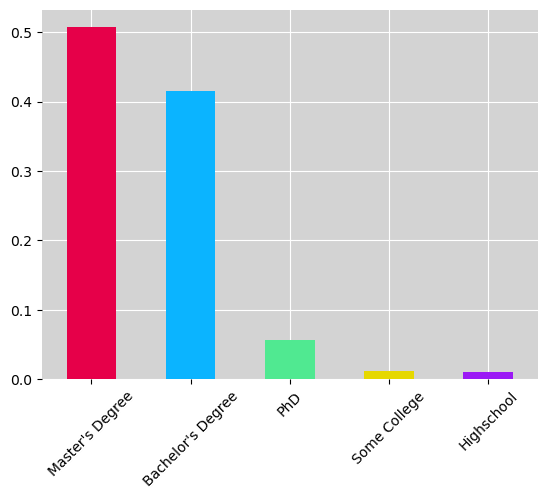

In [28]:
# check education
salary_df.Education.value_counts(normalize=True).plot(kind="bar", color=["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"])
plt.xticks(rotation= 45)

salary_df['Education'].value_counts(normalize=True) * 100

Column Education has Highshool and Some College, they only occupy about 1% each so we decide to do analysis only on Master's Degree, Bachelor's Degree and PhD

In [29]:
q1_df = salary_df[salary_df['Education'].isin(['Master\'s Degree', 'Bachelor\'s Degree', 'PhD'])]

### Everything is already now, let's go to Step 1!!!

***Step 1: Find out the rate of work with their degree, visualize it clearly?***

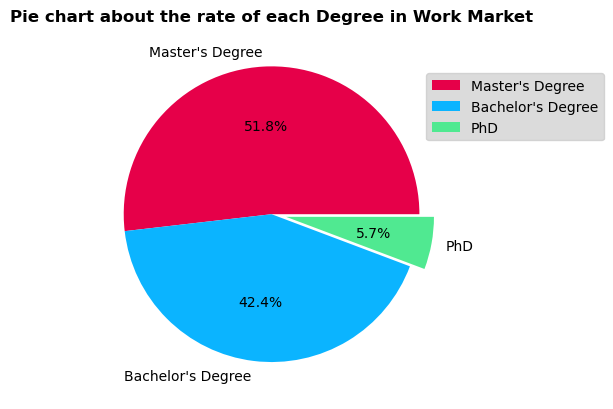

In [56]:
# Percentage of each degree in work market:
q1_df.Education.value_counts(normalize=True).plot(kind="pie", startangle=0, explode=[0, 0, 0.1], autopct='%1.1f%%')
q1_df['Education'].value_counts(normalize=True) * 100

plt.ylabel('')
plt.legend(bbox_to_anchor =(0.9, 0.9))
plt.title('Pie chart about the rate of each Degree in Work Market', fontweight ='bold');

- #### Suprisingly, Job for people had PhD only occupied a light rate in work market, maybe who have PhD have more interest in research at universities, institution, academy,...


***Step 2: For each type of degree, how about the income of each type for a year?***

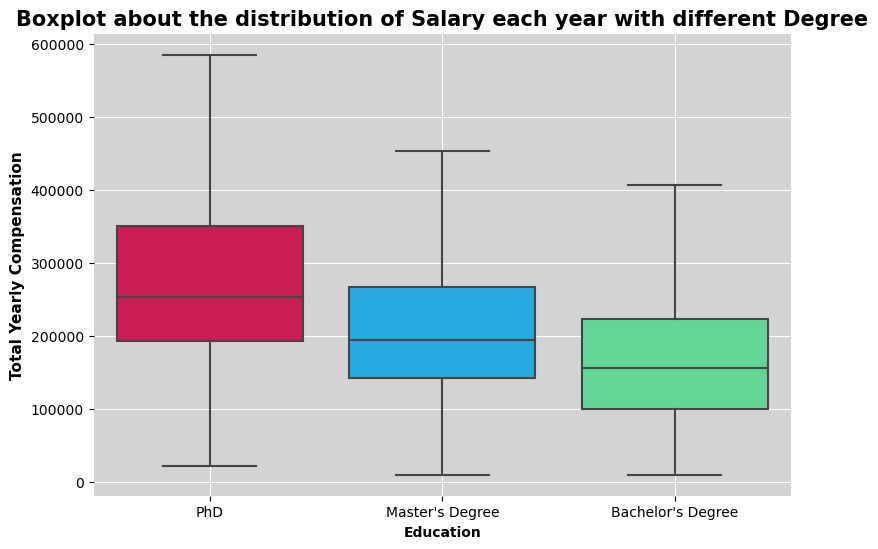

In [58]:
plt.figure(figsize=(9, 6))
sns.boxplot(data = q1_df, x='Education', y='totalyearlycompensation', showfliers=False)
plt.xlabel('Education', fontweight ='bold')
plt.ylabel('Total Yearly Compensation', fontsize=11, fontweight ='bold')
plt.grid(True);
plt.title('Boxplot about the distribution of Salary each year with different Degree', fontsize=15, fontweight ='bold');


- #### In general, although the number of people who have PhD is not many (known from step 1), the income they can receive is higher than people who have orther degree (despite a range of fluctuation).
- #### Hmm...good signal for who want to get a PhD.



***Step 3: For each position, how is the distribution of PhD?***

In [32]:
# Number of each type of degree in each position
df_2column = q1_df.groupby(['title', 'Education']).size()
df_2column = df_2column.unstack().fillna(0)
df_2column

Education,Bachelor's Degree,Master's Degree,PhD
title,,,
Business Analyst,276.0,237.0,5.0
Data Scientist,242.0,798.0,365.0
Hardware Engineer,222.0,840.0,217.0
Human Resources,89.0,99.0,7.0
Management Consultant,252.0,333.0,12.0
Marketing,226.0,182.0,4.0
Mechanical Engineer,159.0,130.0,27.0
Product Designer,386.0,342.0,20.0
Product Manager,669.0,1462.0,35.0


In [33]:
# Order the number of PhD for each position from high to low
df_order = df_2column.sort_values('PhD', ascending=False)
df_order = df_order[["PhD", "Master's Degree", "Bachelor's Degree"]]
df_order

Education,PhD,Master's Degree,Bachelor's Degree
title,,,
Software Engineer,887.0,9213.0,8661.0
Data Scientist,365.0,798.0,242.0
Hardware Engineer,217.0,840.0,222.0
Software Engineering Manager,81.0,862.0,533.0
Product Manager,35.0,1462.0,669.0
Mechanical Engineer,27.0,130.0,159.0
Technical Program Manager,27.0,472.0,312.0
Product Designer,20.0,342.0,386.0
Solution Architect,13.0,282.0,234.0


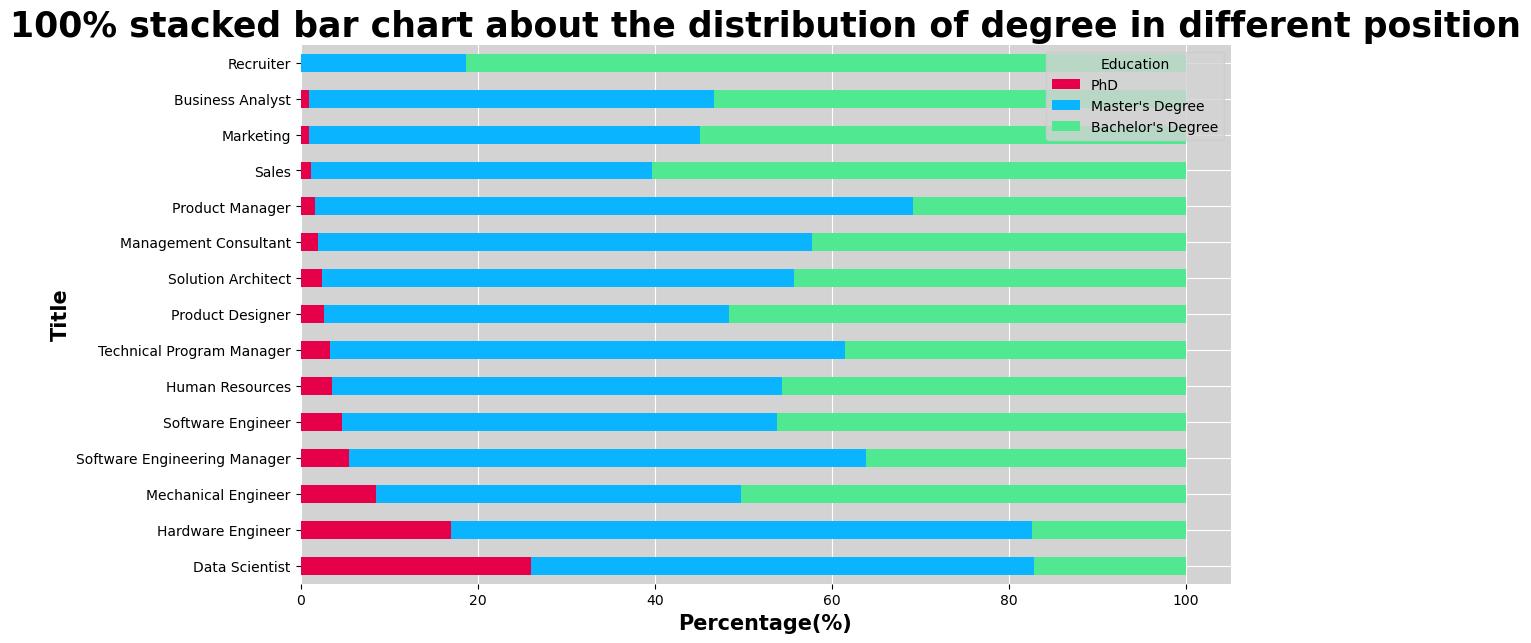

In [53]:
df_percentage = df_order.apply(lambda col: col*100/df_2column.sum(axis=1))
df_percentage = df_percentage.sort_values('PhD', ascending=False)
df_percentage.plot(kind='barh', stacked=True, figsize=(12, 7))
plt.xlabel('Percentage(%)', fontsize=15, fontweight ='bold')
plt.ylabel('Title', fontsize=15, fontweight ='bold')
plt.title('100% stacked bar chart about the distribution of degree in different position', fontsize=25, fontweight ='bold');
plt.grid(True);

- #### It is clear that different position has diffrent percentage of PhD, to be more clear:
- #### Recruiter, Marketing, Sales has the lowest rate of PhD, it is easy to know that these positions have the ability to contact, communicate more than academic field.
- #### Of course, positions which require the researching things, such as Data Scientist, Hardware Engineer, Mechanical Engineer has the highest percentage of PhD (although Master's Degree is also high)

***Step 4: With top 5 position have the most PhD, how about their salary?***

In [35]:
# Select top 5
df_percentage = df_percentage.sort_values('PhD', ascending=False)
top_PhD = df_percentage.index[:5].values
top_PhD

array(['Data Scientist', 'Hardware Engineer', 'Mechanical Engineer',
       'Software Engineering Manager', 'Software Engineer'], dtype=object)

In [36]:
# Average
df_average = q1_df[salary_df.title.isin(top_PhD)]
df_average = df_average.groupby(['title', 'Education'])[['totalyearlycompensation']].mean()
df_average

C:\Users\42nvt\AppData\Local\Temp\ipykernel_39232\464663266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_average = q1_df[salary_df.title.isin(top_PhD)]


totalyearlycompensation
title                        Education                                 
Data Scientist               Bachelor's Degree            155314.049587
                             Master's Degree              188525.062657
                             PhD                          253901.369863
Hardware Engineer            Bachelor's Degree            178400.900901
                             Master's Degree              202908.333333
                             PhD                          251599.078341
Mechanical Engineer          Bachelor's Degree            139616.352201
                             Master's Degree              167576.923077
                             PhD                          220666.666667
Software Engineer            Bachelor's Degree            169140.399492
                             Master's Degree              210244.545751
                             PhD                          306023.675310
Software Engineering Manager Bachelor's Degree            295733.583490
                             Master's Degree              357475.638051
                             PhD                          453617.283951

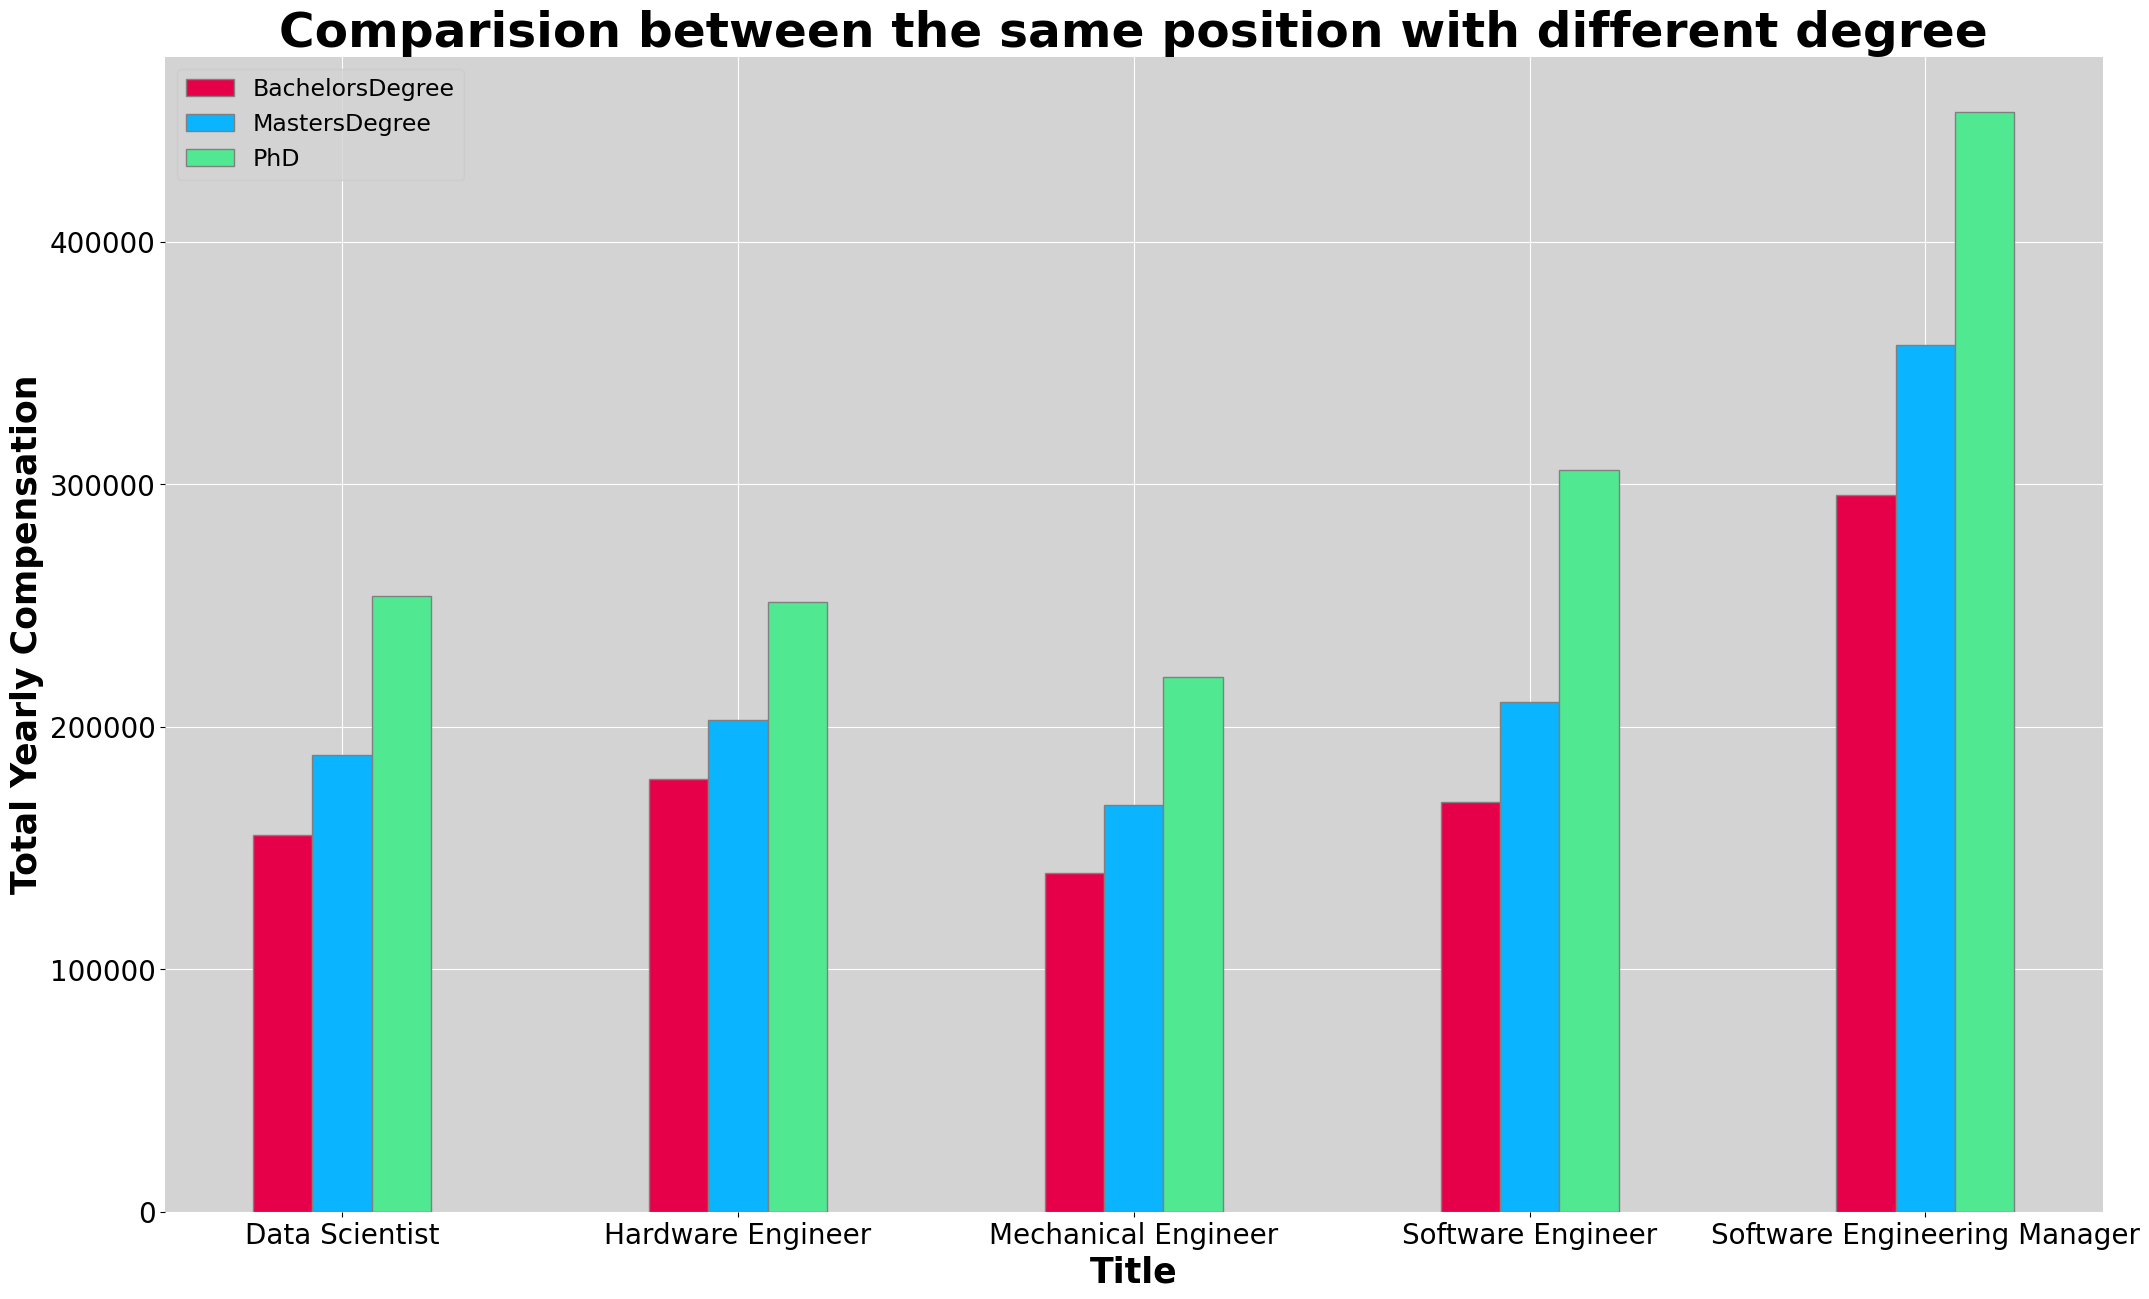

In [61]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(25, 15))
 
# set height of bar
BachelorsDegree = [155314, 178400, 139616, 169140, 295733]
MastersDegree = [188525, 202908, 167576, 210244, 357475]
PhD = [253901, 251599, 220666, 306023, 453617]
 
# Set position of bar on X axis
br1 = np.arange(len(BachelorsDegree))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, BachelorsDegree, width = barWidth,
        edgecolor ='grey', label ='BachelorsDegree')
plt.bar(br2, MastersDegree, width = barWidth,
        edgecolor ='grey', label ='MastersDegree')
plt.bar(br3, PhD, width = barWidth,
        edgecolor ='grey', label ='PhD')

# Adding Xticks
plt.xlabel('Title', fontweight ='bold', fontsize = 25)
plt.ylabel('Total Yearly Compensation', fontweight ='bold', fontsize = 25)
plt.xticks([r + barWidth for r in range(len(BachelorsDegree))],
['Data Scientist', 'Hardware Engineer', 'Mechanical Engineer', 'Software Engineer', 'Software Engineering Manager'], fontsize = 20)
plt.yticks(fontsize=20)
plt.title('Comparision between the same position with different degree', fontsize=35, fontweight ='bold');
plt.legend(prop={'size': 17})
plt.show()

- #### Obviously, top 5 positions have the most PhD, about the salary PhDs can earn always the highest salary compare to the orther, this can prove that it is really worthy to get a PhD.

### Sum up from this question
- The number of jobs for PhD is not too high (lower than Master and Bachelor) but in general the income for people who have a PhD is higher than the orther.
- The number of people who have a PhD only high in some academic position, such as: Data Scientist, Hardware Engineer, Mechanical Engineer and at these position, PhD proves themselves a lot, imcome of them is remarkably higher than the orther, so that in this situation acheving a PhD is a good choice.

---

### Question 2: Top 10 companies based on the number of high-paying jobs, compare their total yearly compensation and does gender pay gap exist in these top 10 companies?

*Total compensation is one of the highest expectations from job applicants to job recruiters. Each company has their range of salary and bonus based on their business scale. Knowing top 10 companies based on the number of high-paying jobs and their total yearly compensation range, job applicants will have more information about each top 10 companies' range of total compensation compared with each others and with all jobs total compensation's median to choose jobs from (people tend to choose higher paying career). And because this is STEM industry, applicants (especially Female) will want to know does gender pay gap exist in the company they are going to apply for a job.*

### Answer:

For this question, we decide to access this content in 4 steps:
- **Step 1:** Chooes high income threshold (we decide to choose the upper quartile as the threshold)
- **Step 2:** Find top 10 companies having the highest number of high-paying jobs (total yearly compensation >= the upper quartile). Visualize the data.
- **Step 3:** Draw box plots of top 10 companies' total yearly compensation to compare with each other and with median of all data total yearly compensation.
- **Step 4:** Find gender ratio in these top 10. Visualize the data.
- **Step 5:** Find each gender median of total yearly compensation in these top 10. Visualize the data.

Before moving on, we know that gender has a missing ratio of 30%, we decide to impute these nan values to have a more correct answer (it's not fill by mode so it is not biased).

In [38]:
salary_df['gender'] = salary_df['gender'].fillna(method='backfill')

**Step 1: Find the threshold (the upper quartile of all rows' totalyearlycompensation)**

In [62]:
threshold = salary_df['totalyearlycompensation'].quantile(0.75)
print('High paying threshold: ', threshold)

High paying threshold:  264000.0


**Step 2: Find top 10 companies having the highest number of high paying jobs and visualize the data**

In [63]:
high_salary_df = salary_df[salary_df['totalyearlycompensation'] >= threshold]
top10_company = high_salary_df['company'].value_counts()[:10]

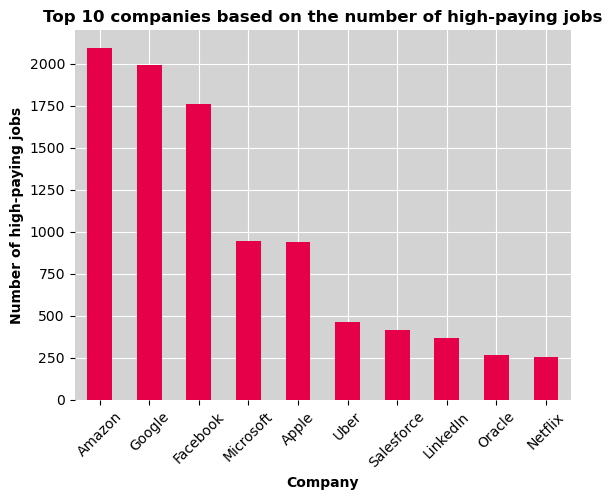

In [64]:
top10_company.plot.bar()
plt.title('Top 10 companies based on the number of high-paying jobs', fontweight ='bold')
plt.xlabel('Company', fontweight ='bold')
plt.ylabel('Number of high-paying jobs', fontweight ='bold')
plt.xticks(rotation = 45) 
plt.show()

*It is no surpise that all the top 10's names are famous ones, especially The Big Five (Google, Amazon, Facebook, Apple, Microsoft).*

**Step 3: Draw box plots of top 10 companies' total yearly compensation to compare with each other and with median of all data total yearly compensation.**

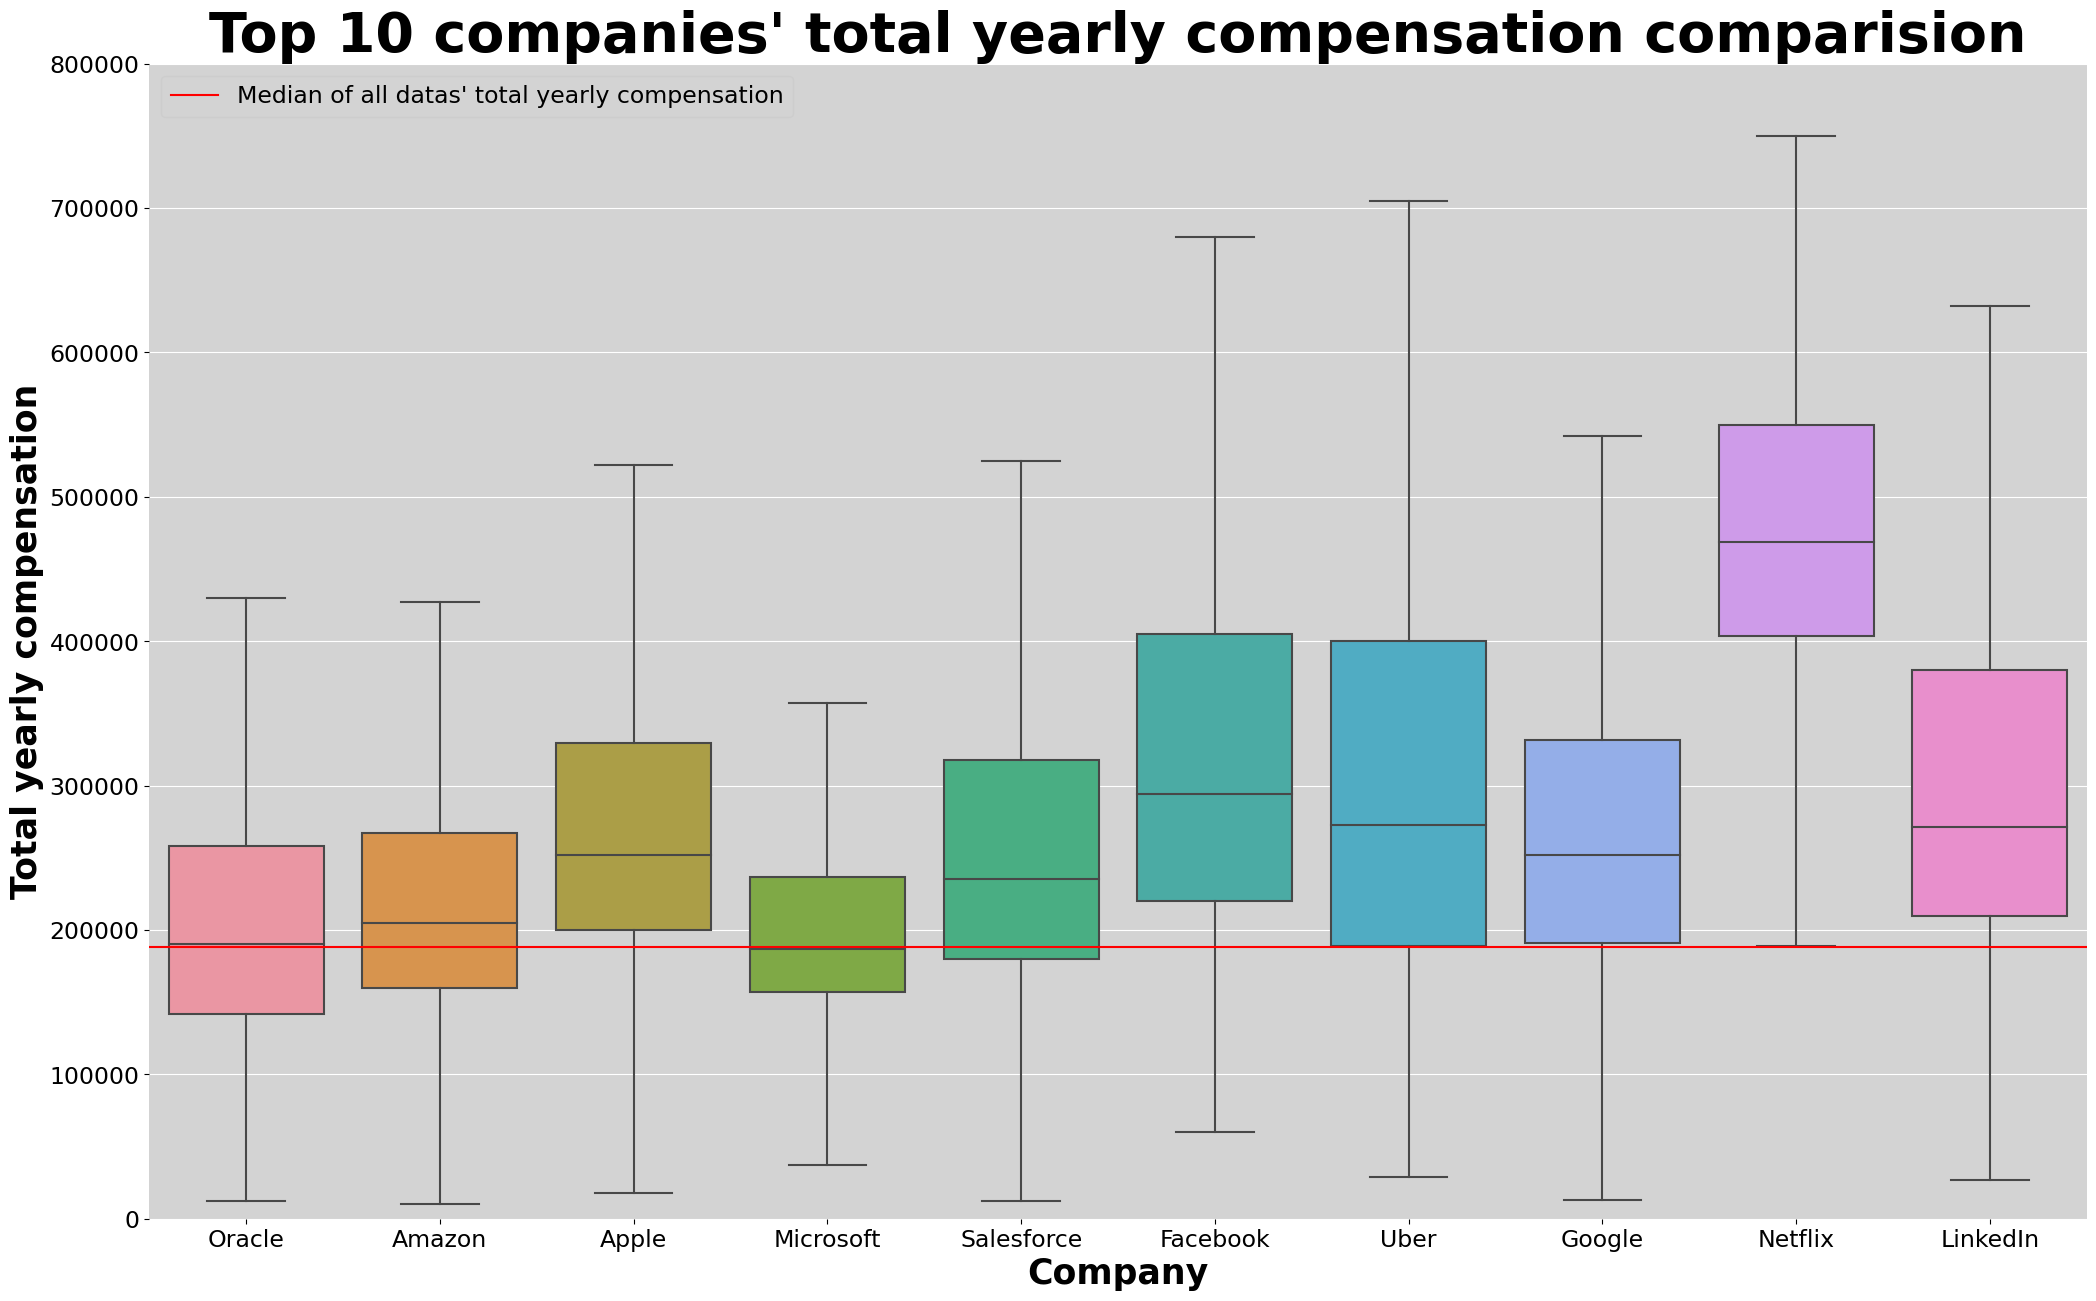

In [42]:
plt.figure(figsize=(25,15))

company_df = salary_df[salary_df['company'].isin(top10_company.keys())]
fig = sns.boxplot(x='company', y='totalyearlycompensation', data=company_df, showfliers = False)

plt.title('Top 10 companies\' total yearly compensation comparision', size=40, fontweight ='bold')
plt.xlabel('Company', size=25, fontweight ='bold')
plt.ylabel('Total yearly compensation', size=25, fontweight ='bold')

median_salary = salary_df['totalyearlycompensation'].median()
plt.axhline(y=median_salary, color='r', linestyle='-', label='Median of all datas\' total yearly compensation')
plt.legend(loc='upper left', prop={'size': 17})

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


fig.axis(ymin=0, ymax=800000);

plt.show()

*Looking at the box plot, we can divide them into 3 groups:*

- ***Equal to the median of all data (Oracle, Amazon, Microsoft):*** *These 3 companies' median of total compensation is very much the same as the median of all data. If high total compensation is what you are looking for, this group is not for you to consider, notably Microsoft (not very high paid jobs compared to the rest of top 10).*
- ***Higher than the median of all data (Apple, Salesforce, Facebook, Uber, Google, Linkedin):*** *This group is the high paid job group, their median of total compensation is 50 000 - 100 000 higher than the median of all data. This is the group for you to consider if one of your job expectations is total compensaation.*
- ***Highest paying company (Netflix):*** *The highest paid job company. If your main goal is total compensation, you sure want to take a look at Netflix, even is's min is equal to the median of all data.*

**Step 4: Find gender ratio in these top 10. Visualize the data.**

In [43]:
genderRatio = company_df.pivot_table(index='company', columns='gender', aggfunc='size')
sums = genderRatio[['Female', 'Male']].sum(axis=1)
genderRatio['FemaleRatio'] = genderRatio['Female'] / sums
genderRatio['MaleRatio'] = genderRatio['Male'] / sums
genderRatio[['MaleRatio', 'FemaleRatio']]

gender,MaleRatio,FemaleRatio
company,,
Amazon,0.852818,0.147182
Apple,0.844181,0.155819
Facebook,0.823077,0.176923
Google,0.843418,0.156582
LinkedIn,0.841655,0.158345
Microsoft,0.832439,0.167561
Netflix,0.798507,0.201493
Oracle,0.821809,0.178191
Salesforce,0.863636,0.136364


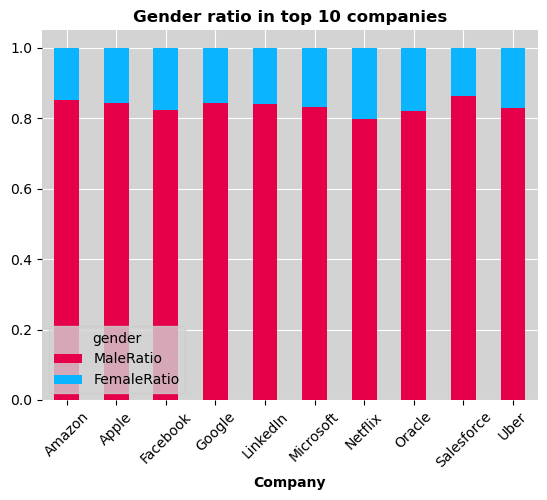

In [44]:
genderRatio[['MaleRatio', 'FemaleRatio']].plot(kind='bar', stacked = True, mark_right=True)

plt.title('Gender ratio in top 10 companies', fontweight ='bold')
plt.xlabel('Company', fontweight ='bold')
plt.xticks(rotation = 45)
plt.show()

*Because top 10 companies here are all tech compnies (male dominted), that explains why there is a huge gendep gap, more than 80% employees are Male. Gender gap does exist, now let's see does gender pay gap exist in these companies.*

**Step 5: Find each gender median of total yearly compensation in these top 10. Visualize the data.**

In [45]:
male = company_df[company_df['gender'] == 'Male']
maleSalary_median = male.groupby('company')['totalyearlycompensation'].median()
maleSalary_median.name = 'Male'

female = company_df[company_df['gender'] == 'Female']
femaleSalary_median = female.groupby('company')['totalyearlycompensation'].median()
femaleSalary_median.name = 'Female'

genderSalary_median = pd.concat([maleSalary_median, femaleSalary_median],axis=1)
genderSalary_median

,Male,Female
company,,
Amazon,207000,200000
Apple,257000,233000
Facebook,299000,267000
Google,255000,240500
LinkedIn,275000,257000
Microsoft,190000,178000
Netflix,474000,432500
Oracle,195000,177000
Salesforce,238000,220000


Check gender pay gap percentage difference

In [46]:
#Calculate percentage different between male and female
percentage_diff = genderSalary_median['Male'] / genderSalary_median['Female'] * 100 - 100
percentage_diff.sort_values()

company
Amazon         3.500000
Google         6.029106
Microsoft      6.741573
LinkedIn       7.003891
Salesforce     8.181818
Netflix        9.595376
Oracle        10.169492
Apple         10.300429
Facebook      11.985019
Uber          13.469388
dtype: float64

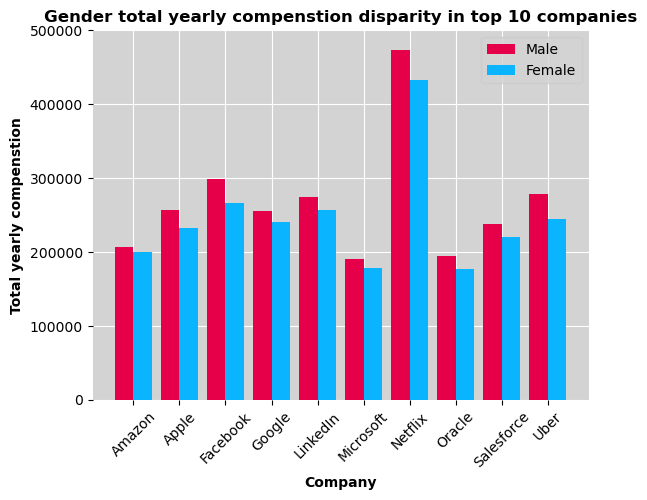

In [47]:
x = np.arange(10)
plt.bar(x - 0.2, maleSalary_median, 0.4, label='Male')
plt.bar(x + 0.2, femaleSalary_median, 0.4, label='Female')

plt.xticks(x, genderSalary_median.index, rotation= 45)    
plt.xlabel("Company", fontweight ='bold')
plt.ylabel("Total yearly compenstion", fontweight ='bold')
plt.title("Gender total yearly compenstion disparity in top 10 companies", fontweight ='bold')
plt.axis(ymax = 500000)
plt.legend()
plt.show()

*It is clearly to notice that there exists gender pay gap among all the top 10 companies.*

- *The pay gap is very notable, total compensation percentage difference range is from 3.5% (Amazon) to 13.5% (Uber).*

- *Except for Amazon's total compensation percentage difference is quite low (only 3.5%), every other companies have noticeable gender pay gap.*

### Conclusion: 

- Top 10 companies based on the number of high-paying jobs are: Amazon, Google, Facebook, Microsoft, Apple, Uber, Salesforce, LinkedIn, Oracle and Netflix. If total compensation is your aim for your career, you should try to apply for these companies. They all have total yearly compensation higher than the median of all data (except for Microsoft).

- Becuse these top 10 companies are all tech companies, there exists huge gender gap and gender pay gap. Attendents (especially Female) should really consider before applying, they may experience gender bias in these companies.

---

# Look back for this project

### Difficulties:
- Finding and selecting a good and suitable dataset took us a large amount of time.
- Thinking and write down a question is also a hard thing, sometimes, we have many useful question but our knowledge now is not good enough to solve it.
- Almost the dataset we found, the number of blank. NaN value is many.
- This dataset includes 29 columns, it is also a hard maths for us to handle all.

### Lessons can earn:
- It is a good chance for us to train our brain practicing the process how to solve a problem strp by step.
- Have a good grasp of visualizing the data for readers can understand by seeing charts,...
- Be patient and always think a trouble in different aspects.

### If we have more time:
- Try our best to apply some machine learning in the project
- Think more deeply about the noise, NaN value
- Try to explore more column in the dataset

# References:
- Link slides of Theory Teacher: https://drive.google.com/drive/folders/1WBgeLNoWVuWRaGrp2i6Z4tAEn8IpFqpq
- How to draw Multiple bar plots: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ 
- Kaggle dataset: https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries/discussion?select=Levels_Fyi_Salary_Data.csv
- All knowledge on theory class of Teacher. Nghĩa
- Lab 01, Lab 02, Lab 03 of Instructor. Long

# THANK YOU TEACHERS FOR ALL THE SUPPORT FOR US.